<a href="https://colab.research.google.com/github/tleitch/BDML/blob/main/LC%20EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<hr style="height:2pt">

In [3]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()


# Accepted Loans

In this section we explore and analyze data about accepted loans since 2007 till 2018. 

We will work with data previously cleaned and augmented with census information. Data cleaning and is in a separate notebook under the Data webpage.

In [4]:
df_loan_accepted_cleaned = pd.read_csv('https://s3.amazonaws.com/ruxton.ai/df_loan_accepted_census_cleaned.csv')

A great deal of our EDA has been devoted to understanding the principal features and, even more importantly, which ones can be used for prediction and which ones cannot because their information is updated after the loan is funded. First we examined few relevant features (univariate analysis) and then continued to look at correlations and other visualizations.

## All Loans

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


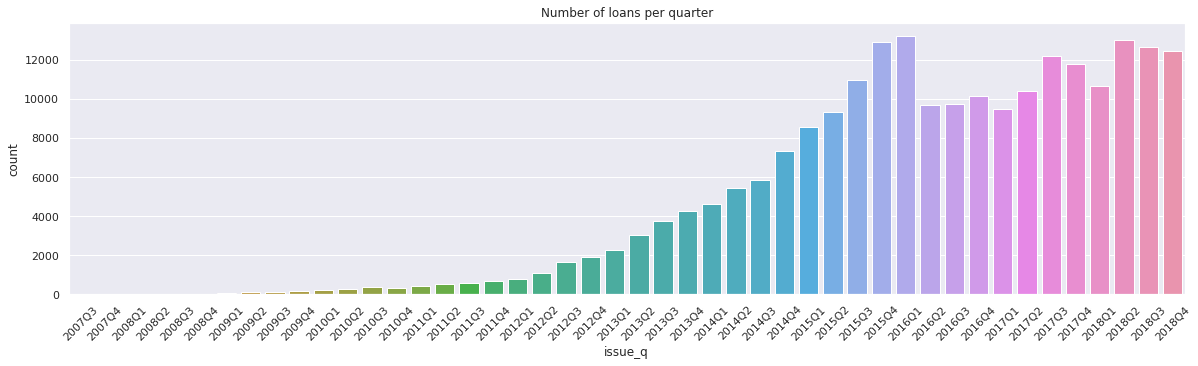

In [5]:
fig, ax = plt.subplots(1,1, figsize=(20,5))
sns.countplot(df_loan_accepted_cleaned.issue_q.sort_values(ascending=True), ax=ax)
plt.title('Number of loans per quarter')
plt.xticks(rotation=45);

As shown below, majority of the loans have been "Fully paid". Many of them are current and few have been charged-off. We can also observed a very few amount of default and late loans.

In [14]:
df_loan_accepted_cleaned.tail(10)

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,collection_recovery_fee,last_pymnt_d,...,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,issue_q,issue_m,success,Population,median_income_2016,male_pct,female_pct,Black_pct,Native_pct,Asian_pct,Hispanic_pct,household_family_pct,poverty_level_below_pct,Graduate_Degree_pct,employment_2016_rate
223133,223133,73746257,19175,19175,19175,60 months,24.99,562.70,F,F3,owner,7,MORTGAGE,54960.0,Verified,Mar-2016,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,other,NaN,583xx,ND,34.98,0.0,Jan-2001,665,669,3.0,0.0,0.0,15.0,0.0,24.0,6226.300000,6226.30,1599.05,3438.63,0.0,213.9516,Dec-2016,...,0.0,2.0,0.0,1.0,0.0,0.0,9.0,6.0,7.0,10.0,12.0,14.0,9.0,15.0,0.0,0.0,4.0,100.0,50.0,0.0,0.0,90177.0,78163.0,12000.0,69177.0,2016Q1,Mar,0,1155.045455,54086.113636,0.516569,0.483431,0.001598,0.175357,0.001405,0.014520,0.666573,0.033217,0.040915,0.776422
223134,223134,65794319,5000,5000,5000,36 months,27.88,206.50,G,G3,NaN,0,RENT,16668.0,Verified,Dec-2015,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,debt consolidation,583xx,ND,30.02,1.0,Mar-2008,695,699,3.0,18.0,0.0,18.0,0.0,24.0,6361.010000,6361.01,3340.49,2319.52,0.0,126.1800,Aug-2018,...,0.0,5.0,18.0,0.0,18.0,0.0,8.0,7.0,10.0,4.0,17.0,20.0,8.0,18.0,0.0,0.0,8.0,95.8,0.0,0.0,0.0,27493.0,10881.0,8000.0,11293.0,2015Q4,Dec,0,1155.045455,54086.113636,0.516569,0.483431,0.001598,0.175357,0.001405,0.014520,0.666573,0.033217,0.040915,0.776422
223135,223135,68605904,29650,29650,29650,36 months,19.89,1100.24,E,E3,driver,2,MORTGAGE,71000.0,Source Verified,Dec-2015,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,debt consolidation,583xx,ND,29.51,0.0,Apr-2004,675,679,0.0,66.0,0.0,15.0,0.0,30.0,31319.120000,31319.12,29650.00,1669.12,0.0,0.0000,Apr-2016,...,1.0,2.0,0.0,6.0,0.0,0.0,7.0,6.0,9.0,11.0,11.0,18.0,7.0,15.0,0.0,0.0,4.0,89.7,50.0,0.0,0.0,178513.0,69033.0,17900.0,65413.0,2015Q4,Dec,1,1155.045455,54086.113636,0.516569,0.483431,0.001598,0.175357,0.001405,0.014520,0.666573,0.033217,0.040915,0.776422
223136,223136,76688417,20575,20575,20575,60 months,18.25,525.28,D,D3,sr impaired debt specialist,10,OWN,63000.0,Not Verified,Apr-2016,Current,https://lendingclub.com/browse/loanDetail.acti...,credit_card,credit card refinancing,583xx,ND,38.15,0.0,Dec-1985,670,674,0.0,59.0,0.0,16.0,0.0,27.0,18363.940000,18363.94,9719.20,8644.74,0.0,0.0000,Mar-2019,...,1.0,25.0,0.0,10.0,0.0,0.0,7.0,4.0,4.0,19.0,7.0,7.0,7.0,16.0,0.0,0.0,1.0,96.3,100.0,0.0,0.0,191943.0,109818.0,5700.0,106266.0,2016Q2,Apr,2,1155.045455,54086.113636,0.516569,0.483431,0.001598,0.175357,0.001405,0.014520,0.666573,0.033217,0.040915,0.776422
223137,223137,96556633,21000,21000,21000,60 months,8.24,428.23,B,B1,teacher,8,MORTGAGE,70000.0,Source Verified,Jan-2017,Current,https://lendingclub.com/browse/loanDetail.acti...,credit_card,credit card refinancing,583xx,ND,25.74,1.0,Sep-2000,750,754,1.0,13.0,0.0,16.0,0.0,35.0,11124.370000,11124.37,8054.88,3069.49,0.0,0.0000,Mar-2019,...,5.0,6.0,13.0,1.0,13.0,0.0,8.0,8.0,15.0,8.0,12.0,22.0,8.0,16.0,0.0,0.0,1.0,97.1,25.0,0.0,0.0,264077.0,63526.0,65700.0,54577.0,2017Q1,Jan,2,1155.045455,54086.113636,0.516569,0.483431,0.001598,0.175357

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


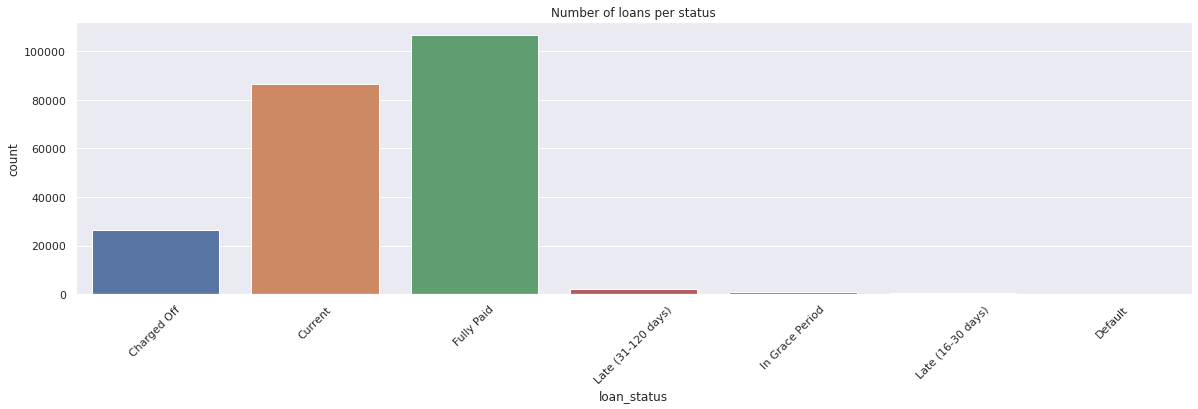

In [9]:
fig, ax = plt.subplots(1,1, figsize=(20,5)) # just formatting 
sns.countplot(df_loan_accepted_cleaned.loan_status, ax=ax)
plt.title('Number of loans per status')
plt.xticks(rotation=45);


Feature “Grade” and “subgrade” classify the various loans into high risk and high profit categories. This feature is very useful for to design an investment strategy. Grade A is the one that is funded a lot with minimal percent of default. In the increasing order of default is Grade FG is least funded and has highest loan amount charged off.  Below is a count plot of the number of loans per grade and subgrade.

As depicted below, most loans are 36-months term with interest rate around 12%, which correspond to grades B and C. There are few outliers with very high interest rates, which we will need to carefully consider during modelling. The inbalanced terms and grades should also be considered with care.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


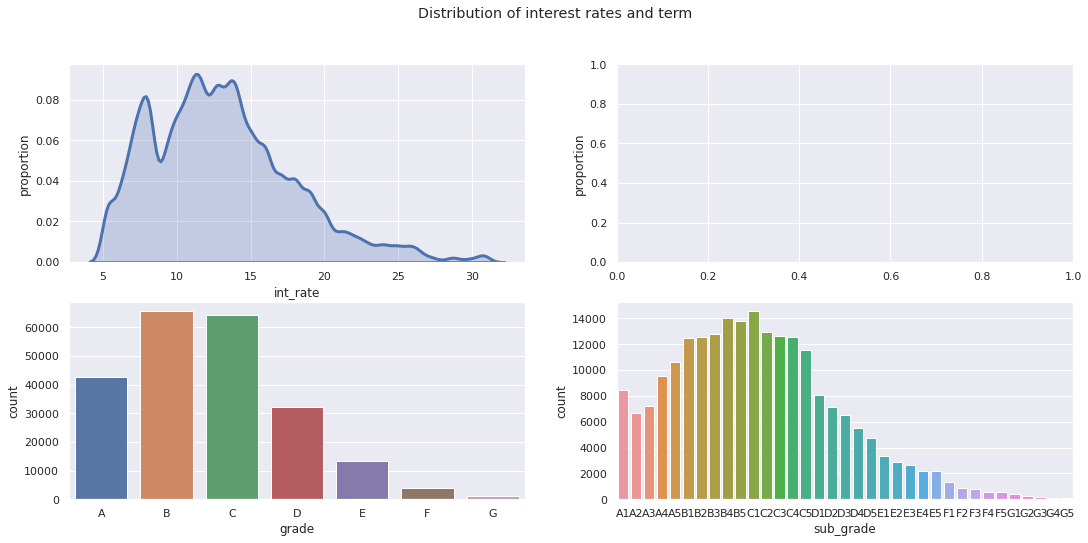

In [15]:
fig, ax = plt.subplots(2,2, figsize=(18,8)) # Just format stuff to layout multiple plots
sns.distplot(df_loan_accepted_cleaned.int_rate, hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3}, ax=ax[0][0])
#sns.distplot(df_loan_accepted_cleaned.term, hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3}, ax=ax[0][1])
sns.countplot(df_loan_accepted_cleaned.grade, order = ['A','B','C','D','E','F','G'], ax=ax[1][0])
sns.countplot(df_loan_accepted_cleaned.sub_grade, order = np.sort(df_loan_accepted_cleaned.sub_grade.unique()), ax=ax[1][1])
ax[0][0].set_ylabel('proportion')
ax[0][1].set_ylabel('proportion')
plt.suptitle('Distribution of interest rates and term');

As we can see in the plots below, `loan_amnt`, `funded_amnt` and `funded_amnt_inv` have almost the same values distribution. It is safe to keep one of those variables.The listed amount of loan applied by the borrower `loan_amnt` is highly correlated with the total amount committed to that loan `funded_amnt` as well as with the total amount committed by investors `funded_amnt_inv`.

We can closely consider `funded_amnt_inv` because it makes more sense for our project goal which is to advise an investor about the best investment strategy with compliance to fairness.

We also plot the distribution of monthly installments, which follows a similar distribution as loan amounts, as expected.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

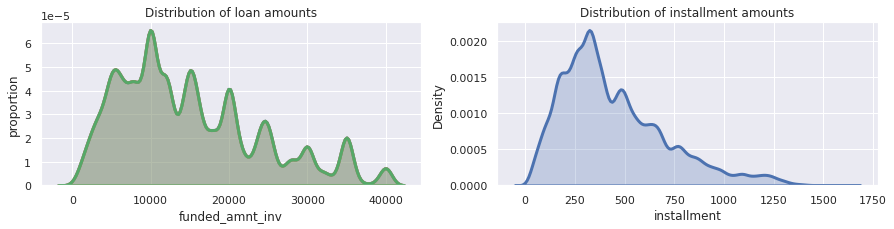

In [16]:
fig, ax = plt.subplots(1,2, figsize=(15,3))
sns.distplot(df_loan_accepted_cleaned.loan_amnt, hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3}, label='loan_amnt', ax=ax[0])
sns.distplot(df_loan_accepted_cleaned.funded_amnt, hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3}, label='funded_amnt', ax=ax[0])
sns.distplot(df_loan_accepted_cleaned.funded_amnt_inv, hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3}, label='funded_amnt_inv', ax=ax[0])
sns.distplot(df_loan_accepted_cleaned.installment, hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3}, label='funded_amnt_inv', ax=ax[1])
ax[0].set_ylabel('proportion')
ax[0].set_title('Distribution of loan amounts')
ax[1].set_title('Distribution of installment amounts')
plt.show()

The figure below shows that debt consolidation is the first major purpose and credit card payments is the second major purposes of lending. Most people tend to borrow some money because they previously borrow some. There could be an increase in probability of being "charged off" in this case, which we will investigate in our models.

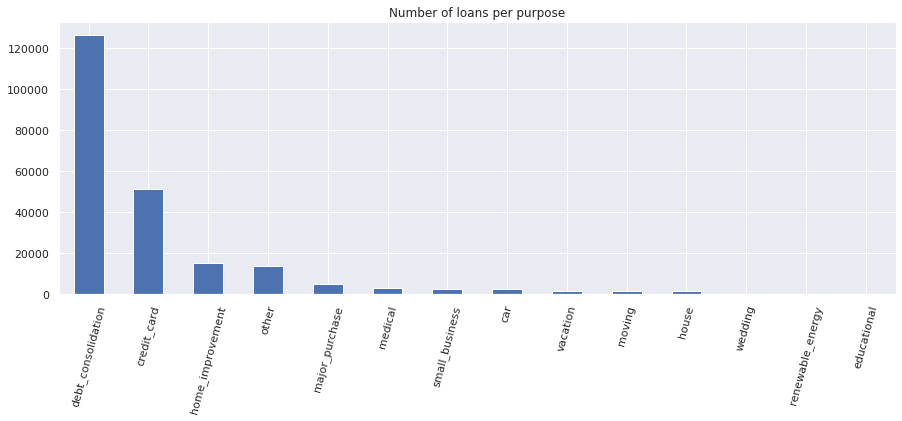

In [18]:
fig, ax = plt.subplots(1,1, figsize=(15,5))
df_loan_accepted_cleaned.purpose.value_counts().plot(kind="bar", ax=ax)
plt.title('Number of loans per purpose')
plt.xticks(rotation=75);

## Paid vs Unpaid Loans

In this section we will have a look at historical loans which were **fully paid** or **charged-off**. Current loans, late or defaulted loans are excluded from this analysis.  

In [19]:
df_loan_for_plot = df_loan_accepted_cleaned.copy()
df_loan_for_plot = df_loan_for_plot[df_loan_for_plot.success.isin([0,1])]

**Funded amount and interest rate**

Below plot we notice that most of these grade have equally paid and unpaid amount when the amount is below a threshold, while for higher valued loan, the grade plays a critical role if the borrower would charge-off.

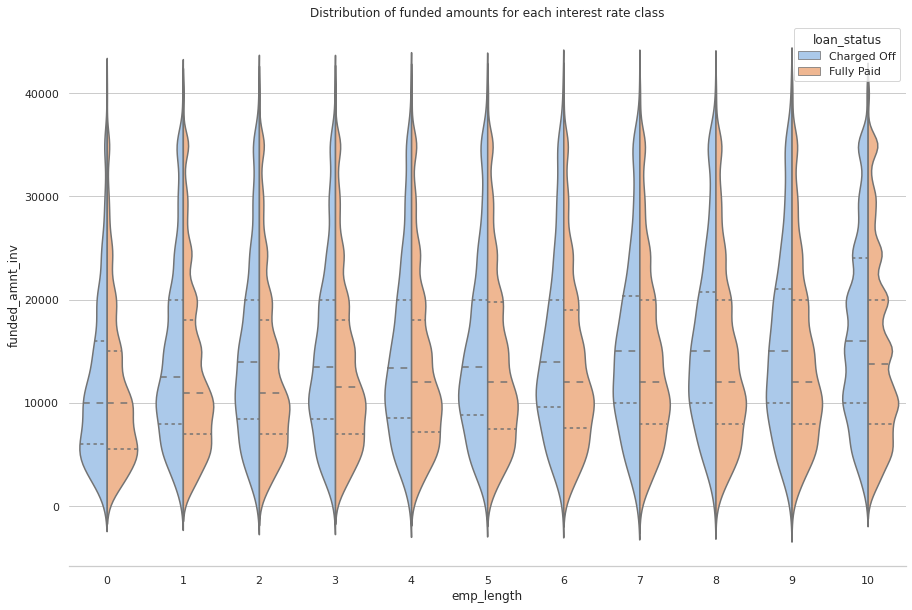

In [24]:
fig, ax = plt.subplots(1,1,figsize=(15,10))
sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.violinplot(x="grade", y="funded_amnt_inv", hue="loan_status",
               split=True, inner="quart",
               data=df_loan_for_plot, ax=ax)
sns.despine(left=True)
ax.set_title('Distribution of funded amounts for each interest rate class');

**Charge-off ratio per grade**

It appears that the grade assigned by LendingClub accurately model the risk of charge-off. In the plot below we can see that the percentage of loans which were not fully paid increases linearly with the interest rate. By assigning a higher grade to a risky loan, LendingClub increases the chances for a faster return of investment.

In [25]:
df = df_loan_for_plot[['loan_status', 'grade','zip_code']].groupby(['grade','loan_status']).agg(['count']).reset_index()
df.columns = df.columns.droplevel(level=1)
unpaid = df[df.loan_status == 'Charged Off']['zip_code']
paid = df[df.loan_status == 'Fully Paid']['zip_code']
#df_paid_perc = pd.DataFrame({'grade':['A','B','C','D','E','F','G'], 'perc':np.divide(unpaid,np.add(paid,unpaid))*100})

In [22]:
#sns.barplot(df_paid_perc.grade, df_paid_perc.perc)
#plt.ylabel('percentage (%)')
#plt.title('Percentage of unpaid loans per grade');

**Purpose and Term**

The plot below shows that debt consolidation and credit card payments are the major purposes of lending. Most people tend to borrow some money because they previously borrow some.  The purpose is however not related to the likelihood of default in loan payment. 36 months is the most common term.

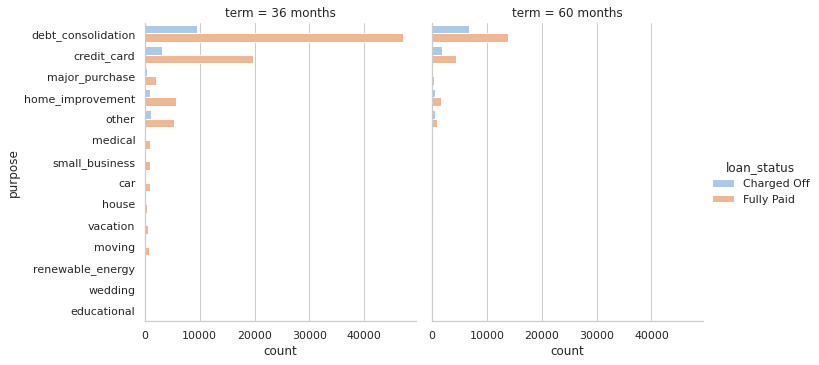

In [26]:
sns.catplot(kind='count', data=df_loan_for_plot, y='purpose', hue='loan_status', col='term');

**Home ownership and employment length**

Below we explore how home ownership and employment length affects the loan outcome for each term (36 or 60 months).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1676: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


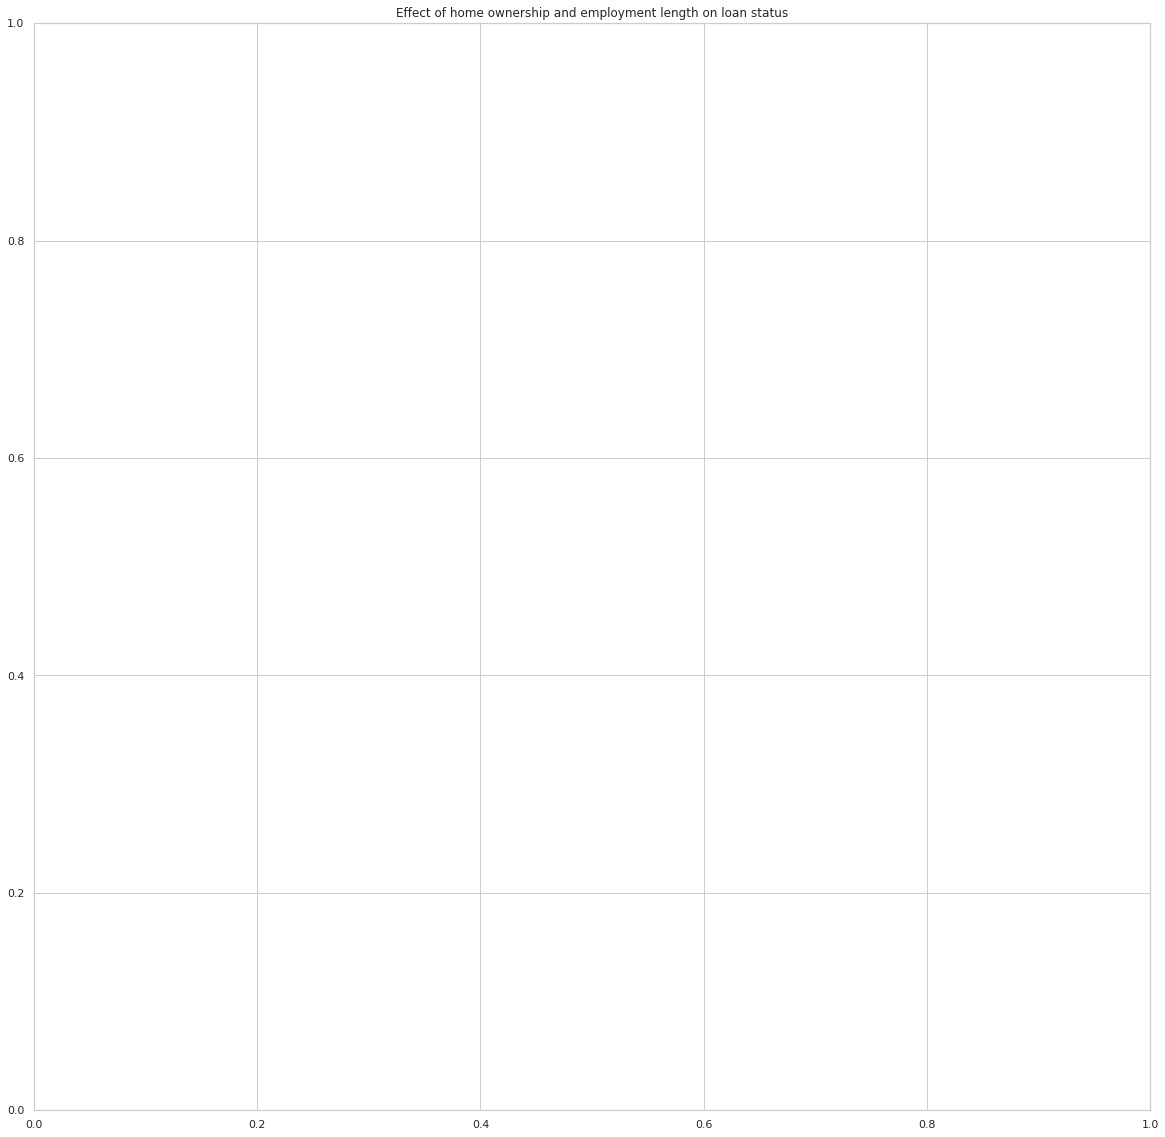

In [27]:
f, ax = plt.subplots(1,1,figsize=(20, 20))
#ax.set_aspect("equal")
term36 = df_loan_for_plot[df_loan_for_plot.term==36].replace({'home_ownership':{'RENT':0,'MORTGAGE':1,'OWN':2,'OTHER':3,'ANY':4,'NONE':5}})
term60 = df_loan_for_plot[df_loan_for_plot.term==60].replace({'home_ownership':{'RENT':0,'MORTGAGE':1,'OWN':2,'OTHER':3,'ANY':4,'NONE':5}})
term36 = term36[term36.home_ownership.isin([0,1,2])]
term60 = term60[term60.home_ownership.isin([0,1,2])]
ax = sns.kdeplot(term36.home_ownership, term36.emp_length,
                 cmap="Reds", shade=True, shade_lowest=False, ax=ax)
ax = sns.kdeplot(term60.home_ownership, term60.emp_length,
                 cmap="Blues", shade=True, shade_lowest=False, ax=ax)
red = sns.color_palette("Reds")[-2]
blue = sns.color_palette("Blues")[-2]
ax.set_title('Effect of home ownership and employment length on loan status');

**Debt-to-income ratio**

Looking at the plot there is no increasing relationship between the interest rate and the debt-to-income ratio. The charged-off loans are almost equally distributed along the debt-to-income ratio axis and interest rate axis. It could be interesting to investigate whether the likelihood of charged-off is mainly guided by both features.

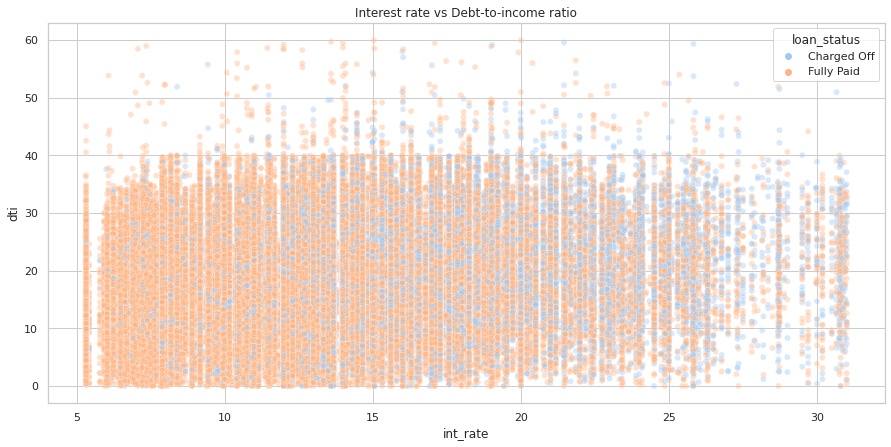

In [28]:
fig, ax = plt.subplots(1,1,figsize=(15,7))
sns.scatterplot(data=df_loan_for_plot[df_loan_for_plot.dti<60], x='int_rate', y='dti', hue='loan_status', alpha=.4, ax=ax)
ax.set_title('Interest rate vs Debt-to-income ratio');

**Revolving bankcards**

The total amount open on revolving bankcards seems not to affect the amount that people will borrow and the likelihood that they will not be able to pay.

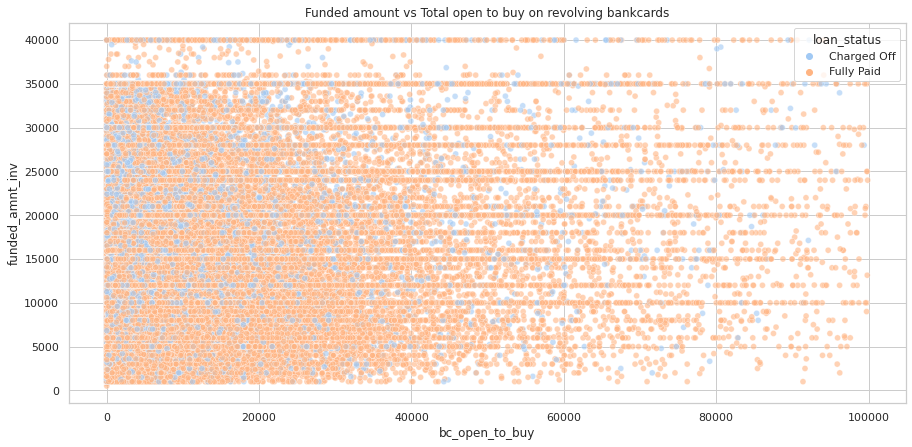

In [29]:
fig, ax = plt.subplots(1,1,figsize=(15,7))
sns.scatterplot(data=df_loan_for_plot[df_loan_for_plot.bc_open_to_buy<100000], x='bc_open_to_buy', y='funded_amnt_inv', hue='loan_status', alpha=.6,ax=ax)
ax.set_title('Funded amount vs Total open to buy on revolving bankcards');

**Credit limit and current balance**

The likelihood of not being debt is probably not dependend on the credit limit of the borrower. People with very high credit limit probably default the same rate as those with low credit limit.

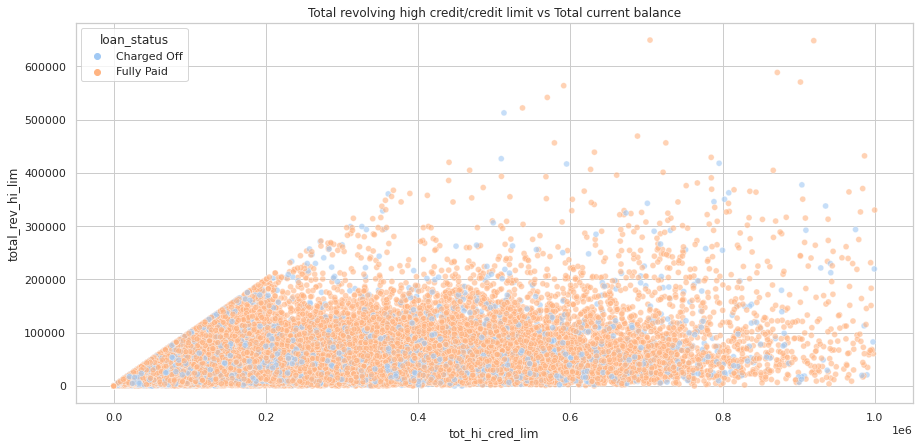

In [30]:
fig, ax = plt.subplots(1,1,figsize=(15,7))
sns.scatterplot(data=df_loan_for_plot[df_loan_for_plot.tot_hi_cred_lim<1000000], x='tot_hi_cred_lim', y='total_rev_hi_lim', hue='loan_status', alpha=.6, ax=ax)
ax.set_title('Total revolving high credit/credit limit vs Total current balance');

**Annual income and loan amount**

LendingClub seems to allow loan amounts at most the half of annual income of the borrower. High loan amount combined with low income look like a precursor of charge-off. Most failed loans are located in that area. Looking at very high income borrower we can still see a lot of failed loans, suggesting that investors should not only look at income.

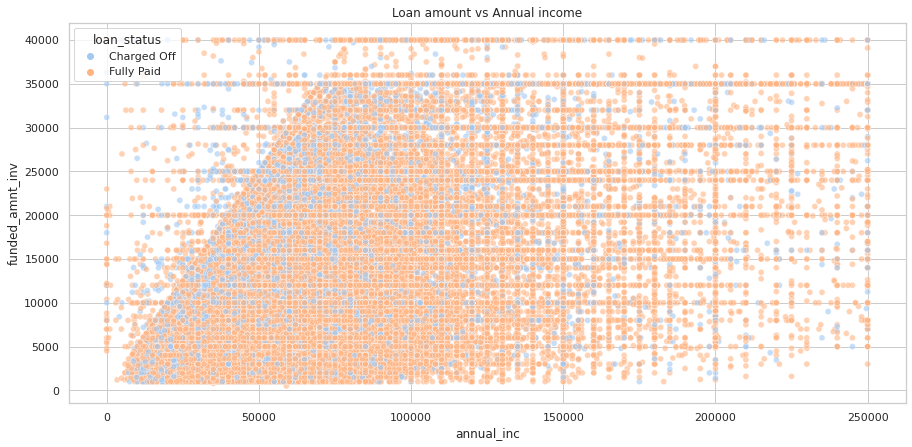

In [32]:
fig, ax = plt.subplots(1,1,figsize=(15,7))
sns.scatterplot(data=df_loan_for_plot[df_loan_for_plot.annual_inc<500000], x='annual_inc', y='funded_amnt_inv', hue='loan_status', alpha=.6, ax=ax)
ax.set_title('Loan amount vs Annual income');

**Credit limit and current balance**

Assuming that the `Total current balance` provided in the dataset was measured at the date when the loan was closed, we can say that the amount of money borrowers do have on their bank accounts does not say much about their ability to pay their loan on time.

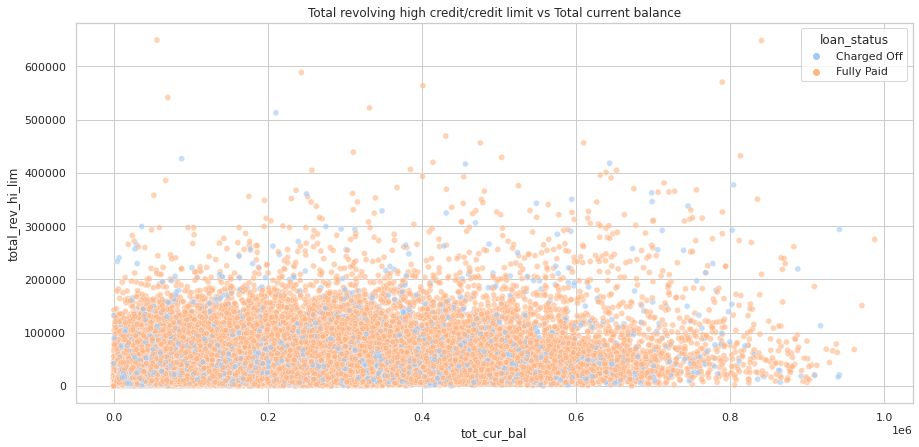

In [33]:
fig, ax = plt.subplots(1,1,figsize=(15,7))
sns.scatterplot(data=df_loan_for_plot[df_loan_for_plot.tot_hi_cred_lim<1000000], x='tot_cur_bal', y='total_rev_hi_lim', hue='loan_status', alpha=.6, ax=ax)
ax.set_title('Total revolving high credit/credit limit vs Total current balance');